In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def show_IoU(pred_bbox, gt_bbox, inter_box):
    plt.figure()
    ax = plt.subplot(111)
    
    box1 = plt.Rectangle(xy=(pred_bbox[0], pred_bbox[3]), height=pred_bbox[1] - pred_bbox[3], width=pred_bbox[2] - pred_bbox[0], color='r')
    box2 = plt.Rectangle(xy=(gt_bbox[0], gt_bbox[3]), height=gt_bbox[1] - gt_bbox[3], width=gt_bbox[2] - gt_bbox[0], color='g')
    box3 = plt.Rectangle(xy=(inter_box[0], inter_box[3]), height=inter_box[1] - inter_box[3], width=inter_box[2] - inter_box[0], linewidth=3,edgecolor="b")
    ax.add_patch(box1)
    ax.add_patch(box2)
    ax.add_patch(box3)
    
    plt.xlim(min(pred_bbox[0], gt_bbox[0], inter_box[0]) - 10, max(pred_bbox[2], gt_bbox[2], inter_box[2]) + 10)
    plt.ylim(min(pred_bbox[1], gt_bbox[1], inter_box[1]) - 10, max(pred_bbox[3], gt_bbox[3], inter_box[3]) + 10)
    plt.show()

In [40]:
def get_IoU(pred_bbox, gt_bbox):
    # 先转化成int坐标
    pred_bbox = [int(i) for i in pred_bbox]
    gt_bbox = [int(i) for i in gt_bbox]
    
    # 先算intersection的四个坐标
    x_min = max(pred_bbox[0], gt_bbox[0])
    x_max = min(pred_bbox[2], gt_bbox[2])
    y_min = max(pred_bbox[1], gt_bbox[1])
    y_max = min(pred_bbox[3], gt_bbox[3])
    
    # 然后算宽和高（但是有可能两个框不交互，这种情况置0的话，之后算iou就能算出是0了）
    inter_width = max(0, x_max - x_min + 1)
    inter_height = max(0, y_max - y_min + 1)
    inter_area = inter_width * inter_height
    print(f"intersection area: {inter_area}")
    
    # 计算IoU
    pred_area = (pred_bbox[2] - pred_bbox[0]) * (pred_bbox[3] - pred_bbox[1])
    gt_area = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])
    
    print(f"pred_box area: {pred_area}")
    print(f"gt_box area: {gt_area}")
    show_IoU(pred_bbox, gt_bbox, [x_min, y_min, x_max, y_max])
    return inter_area / (pred_area + gt_area - inter_area)

intersection area: 441
pred_box area: 2000
gt_box area: 3500


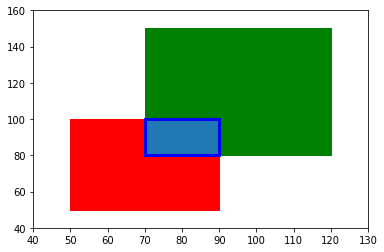

0.08717137774263689


In [41]:
pred_bbox = np.array([50, 50, 90, 100])   # top-left: <50, 50>, bottom-down: <90, 100>, <x-axis, y-axis>
gt_bbox = np.array([70, 80, 120, 150])
print(get_IoU(pred_bbox, gt_bbox))